<p align="center" ><img src="https://www.ai4kids.ai/wp-content/uploads/2019/07/ai4kids_website_logo_120x40.png"></img></p>

# 學AI真簡單 <1> 初探機器學習
## 第三章 動手實作監督式學習 
### 3-3 乳癌機率有多高—KNN 分類器介紹與應用



<p align="right">© Copyright AI4kids.ai</p>

【在開始說明之前】


請先建立colab副本


[檔案] --> [在雲端硬碟中儲存副本]


# 1. 載入所需套件

In [ ]:
# 從 sklearn 載入 breast_cancer 乳癌資料集
from sklearn.datasets import load_breast_cancer   

# 載入我們會用到的模型，KNN分類模型
from sklearn.neighbors import KNeighborsClassifier

# 載入切分資料集成訓練集及測試集的套件，train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np        #是主要用於資料處理上,支援非常多的科學計算，包含矩陣運算、線性代數、傅立葉轉換等。
import pandas as pd        #提供特殊資料結構，具有數據處理和資料分析的功能
import matplotlib.pyplot as plt  #資料視覺化,可以畫出各種圖型如長條圖、分佈圖、立體圖等 
import seaborn as sns       #資料視覺化:個基於 matplotlib 庫的高階 API。還有豐富的視覺化庫，包括一些複雜型別，如時間序列、聯合分佈圖(jointplots)和小提琴圖(violin diagrams)。
 

## 2. 載入資料集，觀察資料集

In [ ]:
# 載入資料集，放到 my_data變數內
my_data = load_breast_cancer()

# 可以把 my_data 給印出來，看一下裡面的內容
# 印出來後可知他有幾個 key name有："data","target","target_names","DESCR","filename" ...等
print(my_data)


# 更多關於此資料集的敘述可以到官網瀏覽
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# 直接觀察有哪些 key 在資料集內
print(my_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


data：特徵實際數據

target：目標值數據

target_names：分類名稱：分別是惡性腫瘤及良性腫瘤（'malignant' 'benign'）
        惡性為1，良性為0

feature_names：各種特征的名稱

In [ ]:
# 觀察資料筆數
print("資料筆數:")
print(my_data.data.shape)
print("\n")

# 觀察我們第一筆的資料內容
print("第一筆的資料內容:")
print(my_data.data[0])
print("\n")

# 觀察我們第一筆的分類目標
print("第一筆的分類目標:")
print(my_data.target[0])
print("\n")

# 觀察我們要預測目標的名稱種類
print("預測目標的名稱種類，分別是惡性腫瘤[0]及良性腫瘤[1]:")
print(my_data.target_names)
print("\n")

資料筆數:
(569, 30)


第一筆的資料內容:
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


第一筆的分類目標:
0


預測目標的名稱種類，分別是惡性腫瘤[0]及良性腫瘤[1]:
['malignant' 'benign']




# 轉換成 DataFrame 格式

In [ ]:
#資料轉成DataFrame
df = pd.DataFrame(my_data.data, columns = my_data.feature_names)
df['target'] = my_data.target

print(df)

     mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
3          11.42         20.38  ...                  0.17300       0
4          20.29         14.34  ...                  0.07678       0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115       0
565        20.13         28.25  ...                  0.06637       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0
568         7.76         24.54  ...                  0.07039       1

[569 rows x 31 columns]


In [ ]:
#看看數據集的訊息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 查看某一個特徵值或target內有哪些『種類』資料

In [ ]:
#查看某一個特徵值或target內有哪些『種類』資料
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

# 看看是否有缺失值

In [ ]:
#是否有空值
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# 3. 切分資料集 - 訓練集 / 測試集

In [ ]:
# 我們將資料切分成兩組，把80%當成訓練集，20%當成測試集
# (train_x, train_y) 為80%的訓練集，用來訓練模型
# (test_x , test_y ) 為20%的測試集，用來驗證模型的預測能力

X_train = df.drop(['target'], axis=1)
Y_train = df['target'] 

train_x, test_x, train_y, test_y = train_test_split(
    my_data.data, my_data.target, test_size= 0.2, random_state=1001, shuffle=True)

# 可以看一下這些資料集的維度，驗證沒有切錯
print("原始資料集的維度大小:" ,my_data.data.shape)
print("訓練集的維度大小:   " ,train_x.shape)
print("測試集的維度大小:   " ,test_x.shape)

原始資料集的維度大小: (569, 30)
訓練集的維度大小:    (455, 30)
測試集的維度大小:    (114, 30)


# 4. 訓練模型及驗證模型 ,K值用預設數

In [ ]:
# 把預先載入好的套件KNN分類器拿出來使用，並且存到變數my_model中
my_model = KNeighborsClassifier()

# 訓練模型，放入要訓練的訓練集(train_x, train_y)
my_model.fit(train_x, train_y)

# 訓練完模型後，我們就可以用 my_model.score 來評估模型的能力
test_score = my_model.score(test_x, test_y)
print("模型評估完測試集的準確度為: ", test_score)

模型評估完測試集的準確度為:  0.9035087719298246


KNeighborsClassifier.score() -> 正確率百分比





# 視覺化觀察


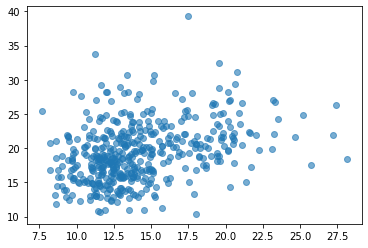

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_x[:,0],train_x[:,1],alpha=0.6)

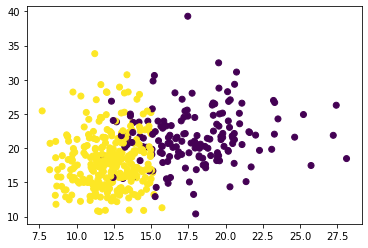

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_x[:,0],train_x[:,1],c=my_model.predict(train_x))

# 調整參數K值 (n_neighbors)

In [ ]:
# 先看看預設的參數是什麼
print (my_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
# K值改273 (原本k=5,準確度0.9035087719298246 ) 
my_model = KNeighborsClassifier(n_neighbors=273)

# 訓練模型，放入要訓練的訓練集(train_x, train_y)
my_model.fit(train_x, train_y)

# 訓練完模型後，我們就可以用 my_model.score 來評估模型的能力
test_score = my_model.score(test_x, test_y)
print("模型評估完測試集的準確度為: ", test_score)

模型評估完測試集的準確度為:  0.7807017543859649


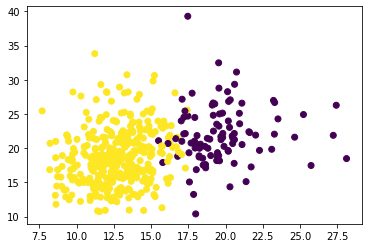

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_x[:,0],train_x[:,1],c=my_model.predict(train_x))

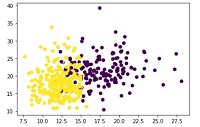

## 如何快速的找到最佳K值？ 



In [ ]:
k_list = np.arange(1,25)
score = []
for k in k_list:
 my_model = KNeighborsClassifier(n_neighbors=k) 
 my_model.fit(train_x, train_y)
 score.append(my_model.score(test_x,test_y))

score 

[0.9035087719298246,
 0.8859649122807017,
 0.8947368421052632,
 0.9035087719298246,
 0.9035087719298246,
 0.9035087719298246,
 0.9210526315789473,
 0.9035087719298246,
 0.9122807017543859,
 0.9122807017543859,
 0.9035087719298246,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8859649122807017,
 0.8947368421052632,
 0.8859649122807017,
 0.8859649122807017]

Text(0, 0.5, 'Accurarcy')

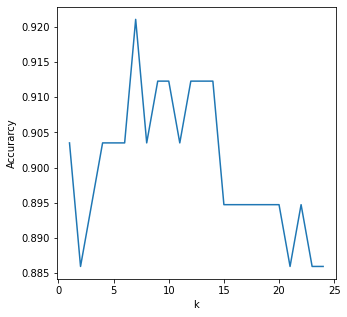

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(k_list,score)
plt.xlabel("k")
plt.ylabel("Accurarcy")

In [ ]:
# 傳回 score list 最大值
np.max(score) 

0.9210526315789473

In [ ]:
 # 傳回 score list 最大值的所在位置
np.argmax(score) 

6

In [ ]:
# 確認
score[6]    

0.9210526315789473

## Q：：所以K=6 準確率最好？？？


# 分析特徵值

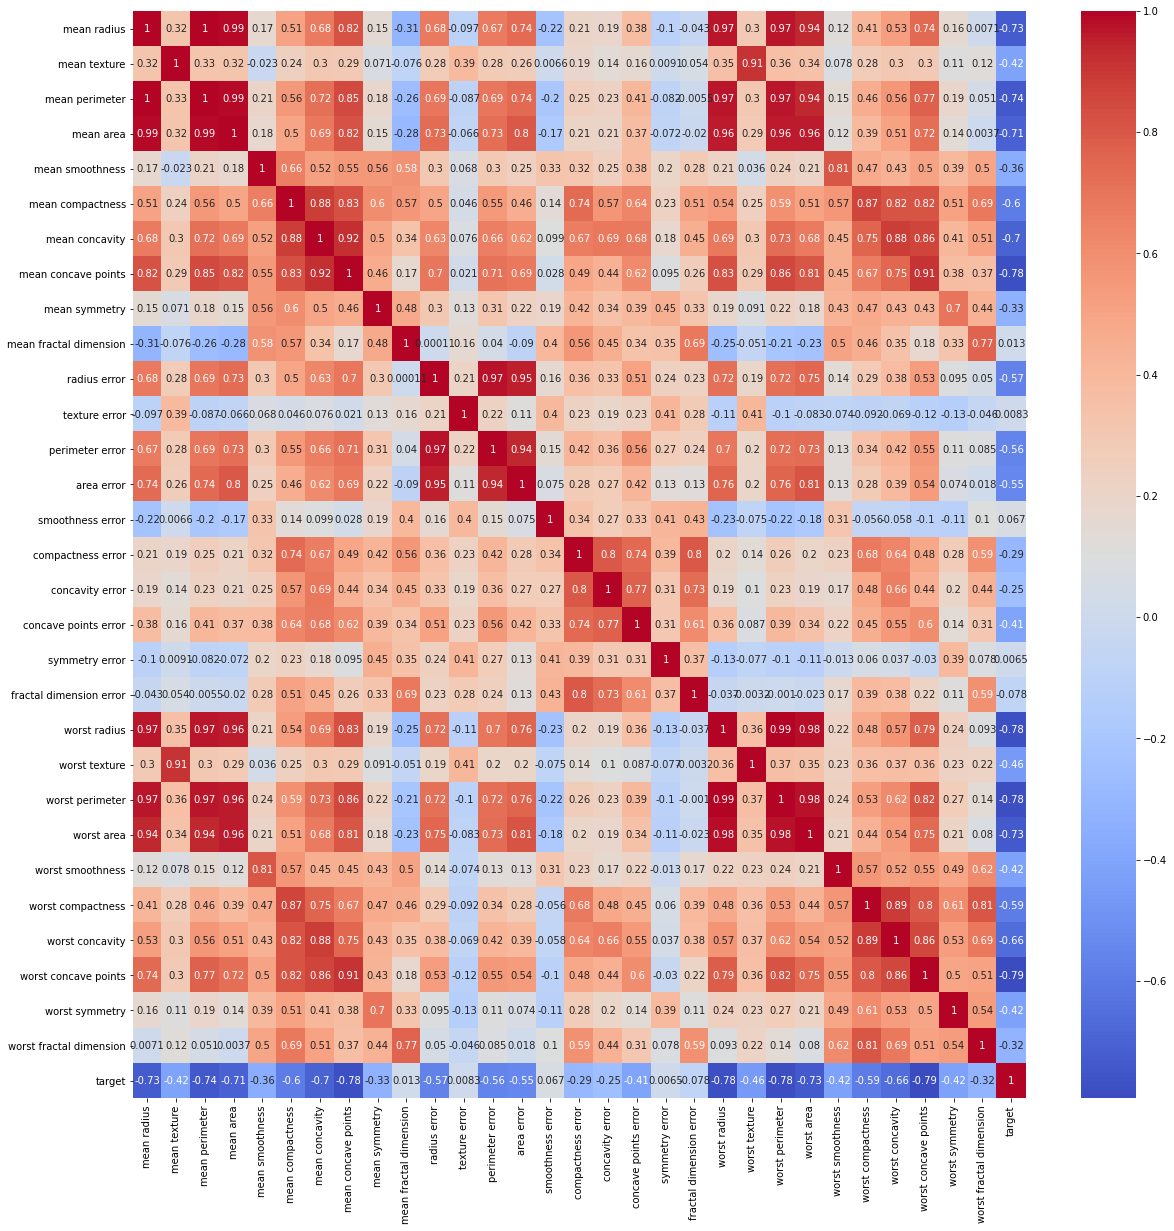

In [ ]:
# 產生畫布
plt.figure(figsize=(20, 20))

# 相關係數分析
correlation= df.corr()

# 產生熱力圖
sns.heatmap(correlation,annot=True,cmap='coolwarm')

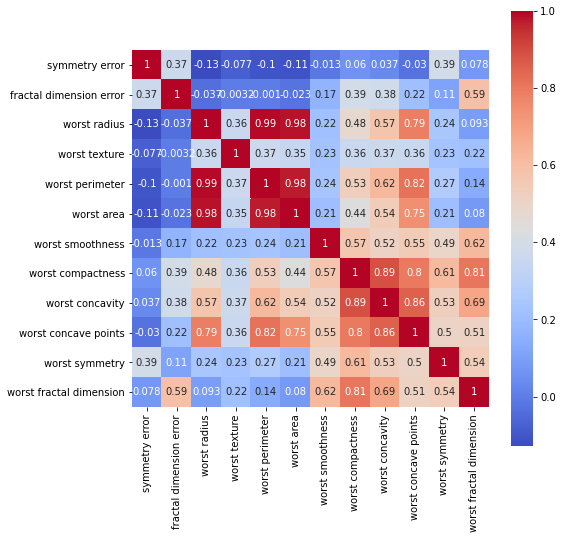

In [ ]:
#只取18-30個，共12個特徵
NUM_POINTS = 29
features_mean= list(df.columns[18:NUM_POINTS+1])

fig=plt.figure(figsize=(8,8))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')


我們有30個定義數據的屬性/特征，然而並非所有這些都是對我們的分類問題有用的。

由相關性(Correlationzp)分析，可以用來消除不重要的屬性。

如果2個要素高度相關，則它們傳達相同的信息。因此，可以刪除其中之一。

## 減少特徵值 ，去除多餘的特徵值

In [ ]:
X_train=df.drop(['target','worst perimeter','worst radius'], axis = 1)
Y_train = df['target'] 

train_x, test_x, train_y, test_y = train_test_split(
    my_data.data, my_data.target, test_size= 0.2, random_state=1001, shuffle=True)


In [ ]:
my_model = KNeighborsClassifier(n_neighbors=7)
my_model.fit(train_x, train_y)
test_score = my_model.score(test_x, test_y)
print("模型評估完測試集的準確度為: ", test_score)

模型評估完測試集的準確度為:  0.9210526315789473


In [ ]:
cancer = df
cancer.describe().T    #查看數據基本統計信息

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744
